- Visual or graphical representation of the data in called as data Visualization
- In python we can do data visualization using matplotlib,seaborn,plotly ,pandas visualization etc

- Matplotlib is a low level graph plotting library in python that serves as a visualization utility
- Seaborn is built on top of matplotlib and we have can themes and other stuff using this

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("DS1_C4_S5_Employee_Data_Practice.xlsx")
df.head()

,Employee_Code,Gender,Department,Annual Salary ($),Age,Work_Experience
0,1010,Male,IT,27000,22,0
1,1011,Female,IT,48000,27,4
2,1012,Male,Sales,75000,31,7
3,1013,Male,Sales,61000,29,6
4,1014,Female,Finance,45000,27,4


In [5]:
df.shape

(70, 6)

In [8]:
df.columns

Index(['Employee_Code ', 'Gender', 'Department', 'Annual Salary ($)', 'Age',
       'Work_Experience'],
      dtype='object')

### line chart

In [ ]:
#line chart,bar chart,scatter plots can take estimators in seaborn

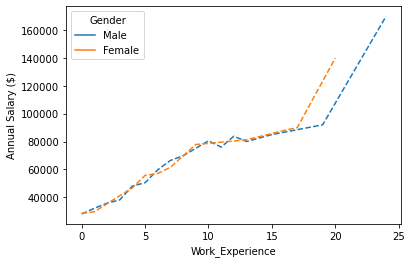

In [25]:
#here we can see that output is aggregated by estimator="mean" by default, u can change it
#that means we are seeing average annual salary per year of experience wrt gender
#ci=None to remove confidence interval
#ls:line style
sns.lineplot(data=df,x="Work_Experience",y="Annual Salary ($)",ci=None,hue="Gender",ls="--");

### pie chart

- It is used to represent the proportion or contribution or composition of each category
- Ex: proportion of  employees in various department

In [147]:
#proportions of total salaries of each department

In [148]:
s=df.groupby("Department")["Annual Salary ($)"].sum()
s

Department
Finance     790000
HR          987000
IT         1282900
Sales      1089000
Name: Annual Salary ($), dtype: int64

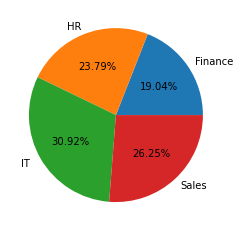

In [149]:
plt.pie(x=s.values,labels=s.index,autopct="%.2f%%")
plt.show()

### bar chart/Column chart


- useful when want to compare the data for different categories by seeing the lengths of the bar
- Ex:Tallest building,Mean sales of different companies

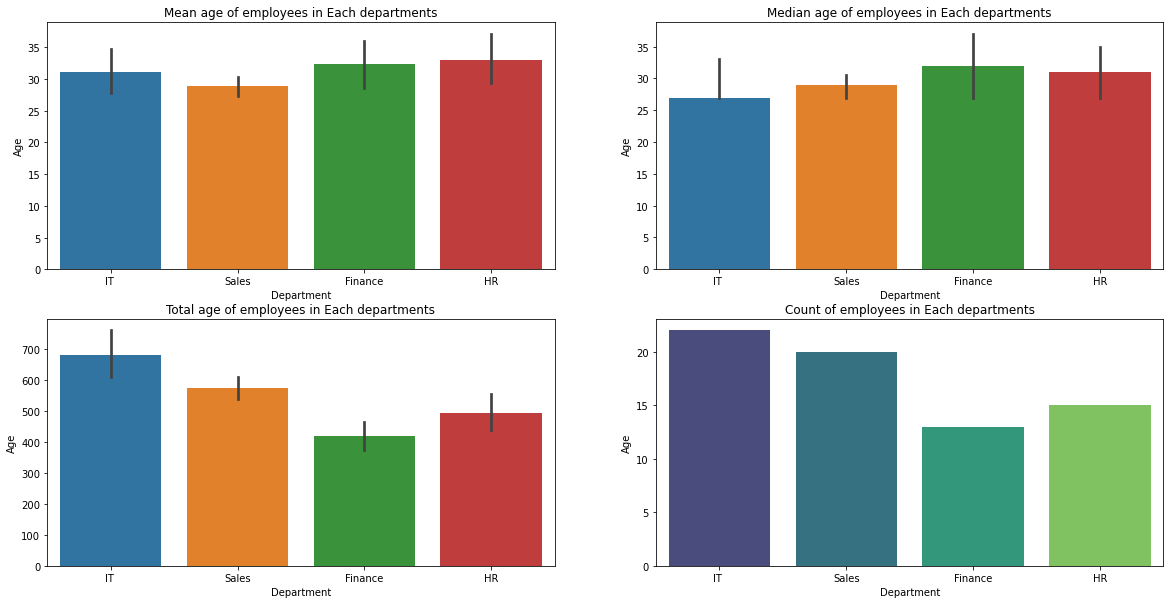

In [24]:
#mean,median,mode,min,max,count age in various departments:default estimator is mean
#np.sum,np.max.np.min,np.mean,np.median,len(for count)
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title("Mean age of employees in Each departments")
sns.barplot(data=df,x="Department",y="Age")

plt.subplot(2,2,2)
plt.title("Median age of employees in Each departments")
sns.barplot(data=df,x="Department",y="Age",estimator=np.median)

plt.subplot(2,2,3)
plt.title("Total age of employees in Each departments")
sns.barplot(data=df,x="Department",y="Age",estimator=np.sum)

plt.subplot(2,2,4)
plt.title("Count of employees in Each departments")
sns.barplot(data=df,x="Department",y="Age",estimator=len,palette="viridis")

plt.show()

#### horizontal bar chart

In [151]:
#Top 10 employees wrt annual salary
x1=df.sort_values("Annual Salary ($)",ascending=False).head(10)[['Employee_Code ',"Annual Salary ($)"]]
x1

,Employee_Code,Annual Salary ($)
64,1073,170000
29,1039,140000
14,1024,95000
20,1030,94000
69,1078,92000
58,1067,90000
57,1066,88000
55,1064,85000
45,1054,83000
65,1074,82500


<AxesSubplot:xlabel='Annual Salary ($)', ylabel='Employee_Code '>

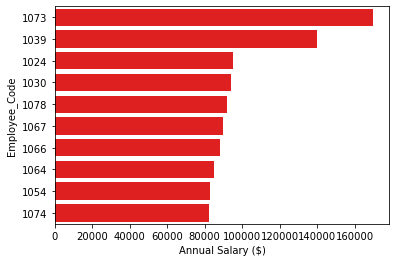

In [152]:
sns.barplot(data=x1,y="Employee_Code ",x="Annual Salary ($)",orient='h',order=x1.sort_values("Annual Salary ($)",ascending=False)["Employee_Code "],color="red")

#### Clustered chart

<AxesSubplot:xlabel='Department', ylabel='Annual Salary ($)'>

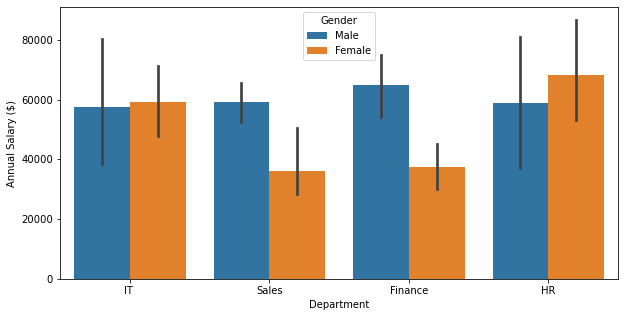

In [153]:
#mean Annual salary for each departments and also wrt gender
#multivariaye analysis
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Department",y="Annual Salary ($)",hue="Gender")

#### Stacked bar chart

In [154]:
#even this is same as cluster chart but within each category division will be in the same bar itself instead of different bar
#this basically can be used with time
#ex:revenue of 3 companies over the years

In [164]:
p=pd.pivot_table(data=df,index="Department",columns="Gender",values="Annual Salary ($)").reset_index()
p

Gender,Department,Female,Male
0,Finance,37500.000000,65000.000000
1,HR,68272.727273,59000.000000
2,IT,59100.000000,57658.333333
3,Sales,36125.000000,59031.250000


<AxesSubplot:xlabel='Department'>

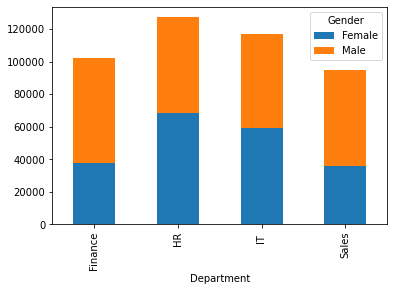

In [166]:
p.plot(x="Department",kind="bar",stacked=True)

#### count plot

In [169]:
#this gives count of each categories

<AxesSubplot:xlabel='Department', ylabel='count'>

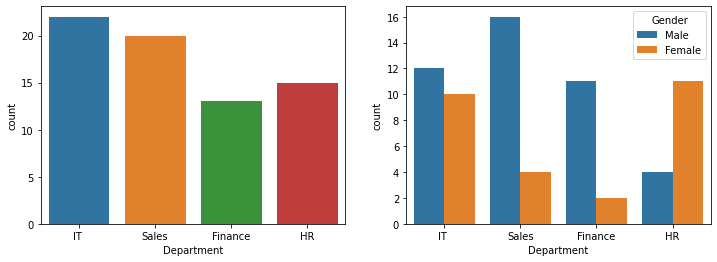

In [174]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(data=df,x="Department")
plt.subplot(122)
sns.countplot(data=df,x="Department",hue='Gender')

# Distribution

In [175]:
# These distribution charts show how the data is distributed 
#useful in statistical analysis

### 1.Boxplot

In [ ]:
#also called as box and whisker plot
#this displays 5 number summary of data:minimum,Q1,median,Q3,maximum
#but with presence of outliers minimum and maximum will be lower and upper fence and values outer from that are outliers

In [176]:
df.head()

,Employee_Code,Gender,Department,Annual Salary ($),Age,Work_Experience
0,1010,Male,IT,27000,22,0
1,1011,Female,IT,48000,27,4
2,1012,Male,Sales,75000,31,7
3,1013,Male,Sales,61000,29,6
4,1014,Female,Finance,45000,27,4


<AxesSubplot:ylabel='Annual Salary ($)'>

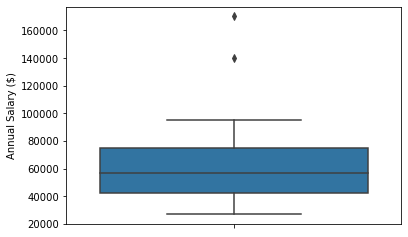

In [183]:
sns.boxplot(data=df,y="Annual Salary ($)")

<AxesSubplot:>

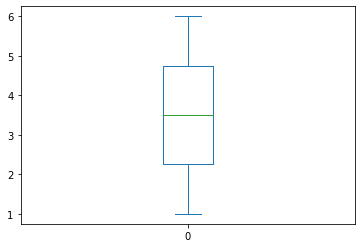

In [194]:
#boxplot without outliers
x=np.array([1,2,3,4,5,6])
pd.DataFrame(x).plot(kind="box")

<AxesSubplot:xlabel='Department', ylabel='Age'>

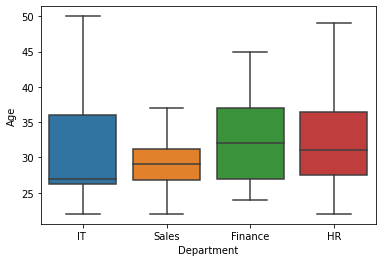

In [233]:
sns.boxplot(data=df,y="Age",x="Department")

<AxesSubplot:xlabel='Department', ylabel='Age'>

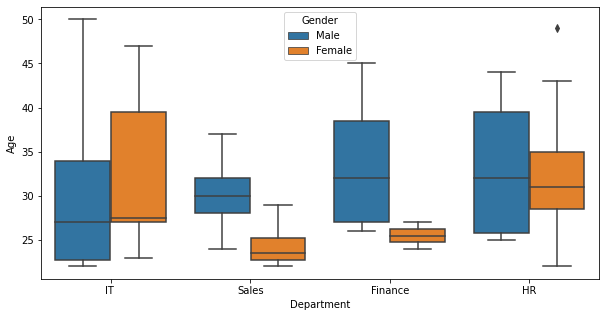

In [235]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,y="Age",x="Department",hue="Gender")

### 2. Histogram

In [195]:
#this is also a plot to check data distribution
#This is used for frequency distribution of data
#we get frequency  for a range or interval of data

In [ ]:
#this created a bin which is basically a range of values and its gives its frequency

array([[<AxesSubplot:title={'center':'Employee_Code '}>,
        <AxesSubplot:title={'center':'Annual Salary ($)'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Work_Experience'}>]], dtype=object)

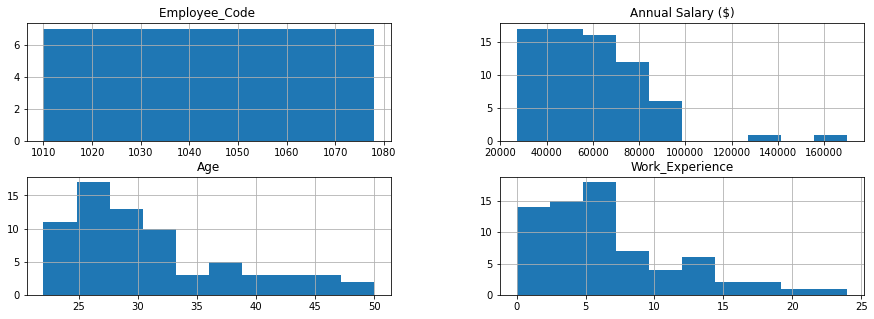

In [198]:
#histogram of all numeric features of a dataset
df.hist(figsize=(15,5))

<AxesSubplot:xlabel='Age', ylabel='Count'>

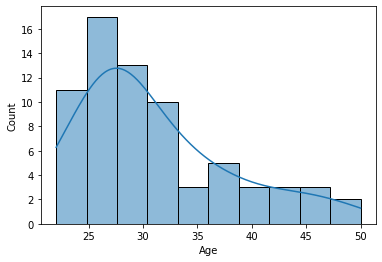

In [26]:
#histogram of a single feature
#if we dont specify bin size it takes automatically best value
#also we can have kde plot on top of hist
sns.histplot(data=df,x="Age",bins=10,kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

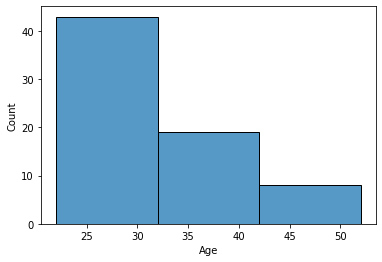

In [201]:
#user defined bin range/size
#bin1:min 22->32
#bin2:32->42
#bin3:42->max 50
sns.histplot(data=df,x="Age",binwidth=10)

<AxesSubplot:xlabel='Age', ylabel='Probability'>

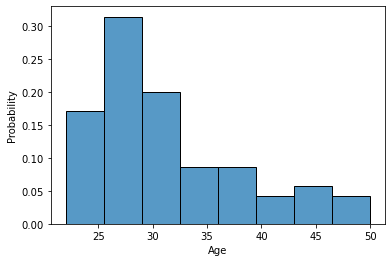

In [239]:
# we can also have other statistical measures like probability,percentage rather than count in this
sns.histplot(data=df,x="Age",stat="probability")

### kdeplot

In [ ]:
#kernel density estimate:it represents the data using a continuous probability density curve

<AxesSubplot:xlabel='Age', ylabel='Density'>

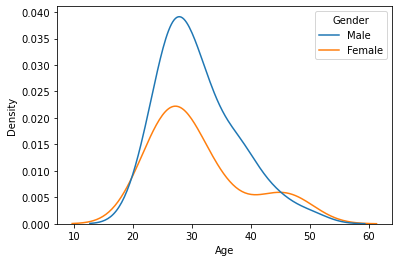

In [240]:
sns.kdeplot(data=df,x="Age",hue="Gender")

# linear relationship plots

In [216]:
#these plots are used to plot the two numerical columns
#Scatter plots are the graphs that present the relationship between two variables in a data-set
#pairplot is nothing but scatter plots of all combinations of features in dataset

In [217]:
df.head()

,Employee_Code,Gender,Department,Annual Salary ($),Age,Work_Experience
0,1010,Male,IT,27000,22,0
1,1011,Female,IT,48000,27,4
2,1012,Male,Sales,75000,31,7
3,1013,Male,Sales,61000,29,6
4,1014,Female,Finance,45000,27,4


<AxesSubplot:xlabel='Annual Salary ($)', ylabel='Age'>

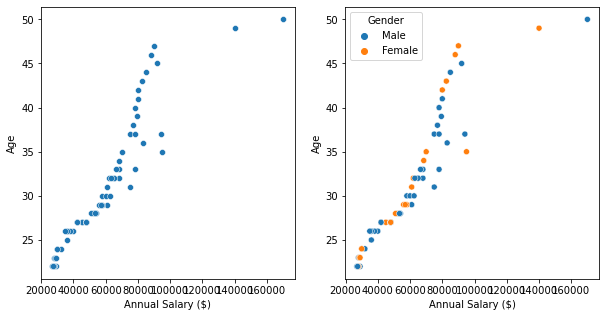

In [226]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.scatterplot(data=df,x="Annual Salary ($)",y="Age")
plt.subplot(122)
sns.scatterplot(data=df,x="Annual Salary ($)",y="Age",hue="Gender")

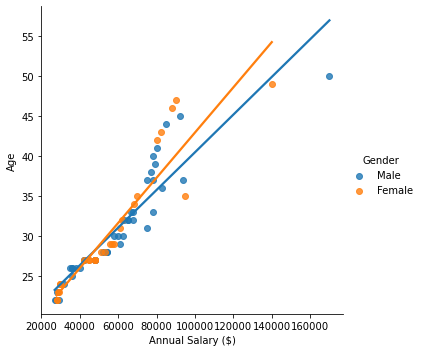

In [35]:
#im:scatterplot with a fitted regression line which can take hue also for comparing variables
sns.lmplot(data=df,x="Annual Salary ($)",y="Age",ci=None,hue="Gender")

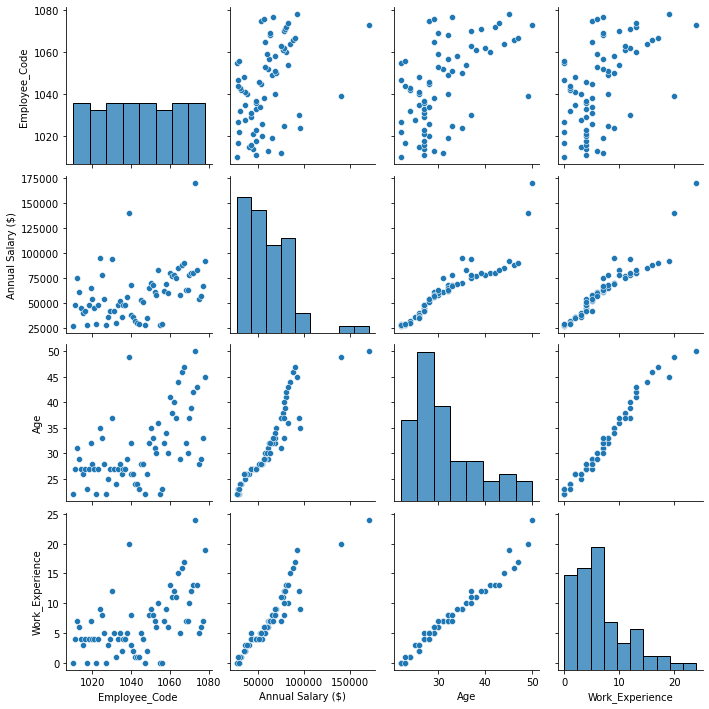

In [221]:
#pairplot
sns.pairplot(df)

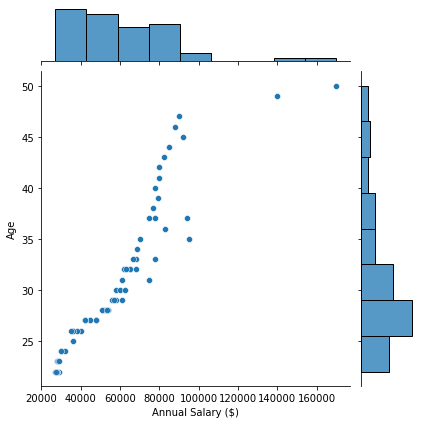

In [36]:
#joint plot:scatterplot+distribution plot like histogram
sns.jointplot(data=df,x="Annual Salary ($)",y="Age")

### heatmap

In [241]:
#A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.
#example:correlation matrix ,P/L statement in stock broker
#basically this shows the values for for corresponing x and y  variables in x and y axis by color coding.usually dark color represents higher values.

<AxesSubplot:>

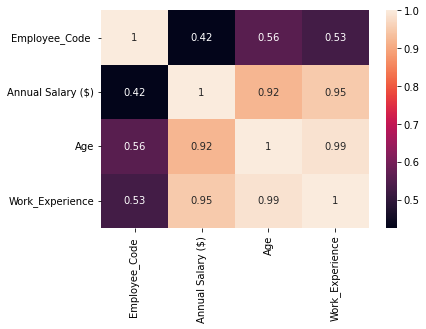

In [244]:
#this shows the correlation matrix in visual format
sns.heatmap(df.corr(),annot=True)

# Time Series

In [247]:
df=pd.read_csv("time.csv")
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [258]:
df["DATE"]=pd.to_datetime(df["DATE"])

In [265]:
df.set_index("DATE",inplace=True)

In [267]:
df=df.resample("M").sum()

In [269]:
df.head()

,Value
DATE,
1985-01-31,72.5052
1985-02-28,70.6720
1985-03-31,62.4502
1985-04-30,57.4714
1985-05-31,55.3151


<AxesSubplot:xlabel='DATE'>

<Figure size 1440x360 with 0 Axes>

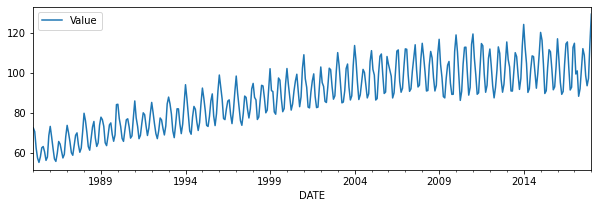

In [274]:
df.plot(figsize=(10,3))

### simple line chart

In [3]:
x=np.array([1,2,3,4,5,6,])
y=np.array([10,22,23,21,15,19])

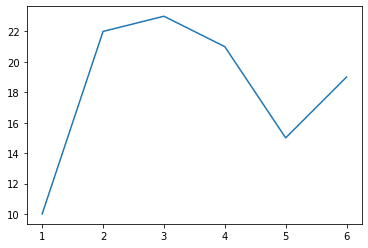

In [4]:
plt.plot(x,y)

## Facetgrid

In [38]:
df.head()

,Employee_Code,Gender,Department,Annual Salary ($),Age,Work_Experience
0,1010,Male,IT,27000,22,0
1,1011,Female,IT,48000,27,4
2,1012,Male,Sales,75000,31,7
3,1013,Male,Sales,61000,29,6
4,1014,Female,Finance,45000,27,4


In [40]:
df["Department"].nunique()

4

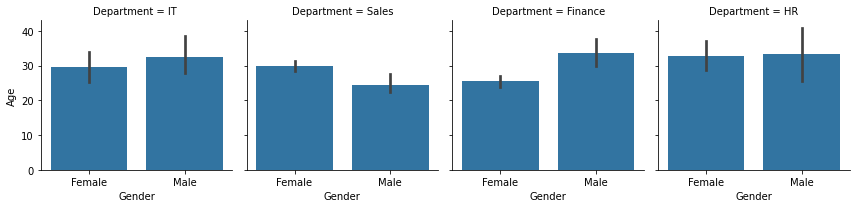

In [43]:
f=sns.FacetGrid(data=df,col="Department")
f.map_dataframe(sns.barplot,x="Gender",y="Age")

In [ ]:
#mixing matplotlib object concepts with sns plots

<AxesSubplot:xlabel='Age', ylabel='Count'>

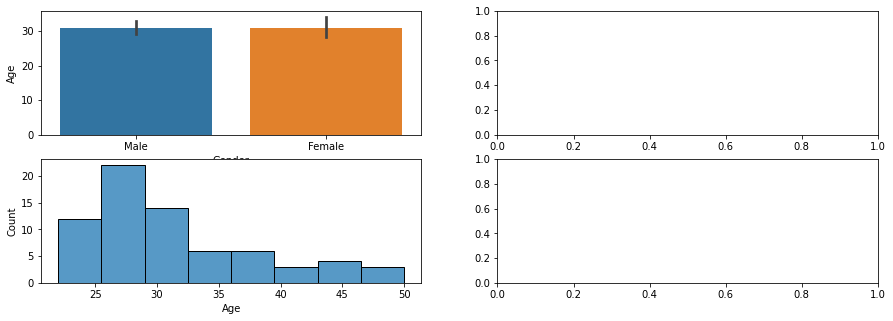

In [51]:
fig,ax=plt.subplots(2,2,figsize=(15,5))
sns.barplot(data=df,x="Gender",y="Age",ax=ax[0][0])
sns.histplot(data=df,x="Age",ax=ax[1][0])